<a href="https://colab.research.google.com/github/mittalmeghna/projects/blob/master/CNN_Cats_and_Dogs_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 : Frame the Problem

Identify the cat or dog from the set of images in the given dataset.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15330971349913910016
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6358190334806337211
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17621689800145644223
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14234881229
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1780222543743563916
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


# 02 : Obtaining the Data

In [0]:
ls -l

total 1333728
-rw-r--r-- 1 root root    522241 May  5 19:39 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset/
-rw-r--r-- 1 root root 227353580 May  5 19:01 dataset.zip
-rw-r--r-- 1 root root 227353580 May  5 19:08 dataset.zip.1
-rw-r--r-- 1 root root 227353580 May  5 19:11 dataset.zip.2
-rw-r--r-- 1 root root 227353580 May  5 19:13 dataset.zip.3
-rw-r--r-- 1 root root 227353580 May  5 19:19 dataset.zip.4
-rw-r--r-- 1 root root 227353580 May  5 19:39 dataset.zip.5
-rw-r--r-- 1 root root    352640 May  5 17:02 fn.save
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX/
-rw-r--r-- 1 root root     28629 May  5 16:50 production.csv
-rw-r--r-- 1 root root     28629 May  5 16:51 production.csv.1
-rw-r--r-- 1 root root     28629 May  5 16:53 production.csv.2
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.3
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.4
-rw-r--r-- 1 root root     28629 May  5 16:59 production.csv.5
-rw-r--r-- 1 root root     28629 May  5

In [0]:
!wget https://www.dropbox.com/s/avul1qk8eeaqebo/dataset.zip

--2019-05-05 19:49:17--  https://www.dropbox.com/s/avul1qk8eeaqebo/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/avul1qk8eeaqebo/dataset.zip [following]
--2019-05-05 19:49:17--  https://www.dropbox.com/s/raw/avul1qk8eeaqebo/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52a6b7a65becdc84cb0fa074cf.dl.dropboxusercontent.com/cd/0/inline/AgXMln10DVxZCNBRUeMYkFS7B6TYGiMp4idYd8lZHi0SlUrSRDPqpvlQPg8-LvLHTDXfvzfGek6zjJe9rr9FENca0TsBjr_YT_UCJ5V5Bw9ZLw/file# [following]
--2019-05-05 19:49:17--  https://uc52a6b7a65becdc84cb0fa074cf.dl.dropboxusercontent.com/cd/0/inline/AgXMln10DVxZCNBRUeMYkFS7B6TYGiMp4idYd8lZHi0SlUrSRDPqpvlQPg8-LvLHTDXfvzfGek6zjJe9rr9FENca0TsBjr_YT_UCJ5V5Bw9ZLw/file
Resolving uc52a6b7a65b

In [0]:
cat wget-log.1 # 

cat: wget-log.1: No such file or directory


In [0]:
ls -l

total 1555756
-rw-r--r-- 1 root root    522241 May  5 19:39 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset/
-rw-r--r-- 1 root root 227353580 May  5 19:01 dataset.zip
-rw-r--r-- 1 root root 227353580 May  5 19:08 dataset.zip.1
-rw-r--r-- 1 root root 227353580 May  5 19:11 dataset.zip.2
-rw-r--r-- 1 root root 227353580 May  5 19:13 dataset.zip.3
-rw-r--r-- 1 root root 227353580 May  5 19:19 dataset.zip.4
-rw-r--r-- 1 root root 227353580 May  5 19:39 dataset.zip.5
-rw-r--r-- 1 root root 227353580 May  5 19:49 dataset.zip.6
-rw-r--r-- 1 root root    352640 May  5 17:02 fn.save
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX/
-rw-r--r-- 1 root root     28629 May  5 16:50 production.csv
-rw-r--r-- 1 root root     28629 May  5 16:51 production.csv.1
-rw-r--r-- 1 root root     28629 May  5 16:53 production.csv.2
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.3
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.4
-rw-r--r-- 1 root root     28629 May  5 16

In [0]:
!unzip dataset.zip >> 0 # What does it do?

replace dataset/single_prediction/Icon? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!ls -l

total 1555756
-rw-r--r-- 1 root root    522263 May  5 19:49 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset
-rw-r--r-- 1 root root 227353580 May  5 19:01 dataset.zip
-rw-r--r-- 1 root root 227353580 May  5 19:08 dataset.zip.1
-rw-r--r-- 1 root root 227353580 May  5 19:11 dataset.zip.2
-rw-r--r-- 1 root root 227353580 May  5 19:13 dataset.zip.3
-rw-r--r-- 1 root root 227353580 May  5 19:19 dataset.zip.4
-rw-r--r-- 1 root root 227353580 May  5 19:39 dataset.zip.5
-rw-r--r-- 1 root root 227353580 May  5 19:49 dataset.zip.6
-rw-r--r-- 1 root root    352640 May  5 17:02 fn.save
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX
-rw-r--r-- 1 root root     28629 May  5 16:50 production.csv
-rw-r--r-- 1 root root     28629 May  5 16:51 production.csv.1
-rw-r--r-- 1 root root     28629 May  5 16:53 production.csv.2
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.3
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.4
-rw-r--r-- 1 root root     28629 May  5 16:5

# 04 : Feature Engineering

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
ls -l 

total 1555756
-rw-r--r-- 1 root root    522263 May  5 19:49 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset/
-rw-r--r-- 1 root root 227353580 May  5 19:01 dataset.zip
-rw-r--r-- 1 root root 227353580 May  5 19:08 dataset.zip.1
-rw-r--r-- 1 root root 227353580 May  5 19:11 dataset.zip.2
-rw-r--r-- 1 root root 227353580 May  5 19:13 dataset.zip.3
-rw-r--r-- 1 root root 227353580 May  5 19:19 dataset.zip.4
-rw-r--r-- 1 root root 227353580 May  5 19:39 dataset.zip.5
-rw-r--r-- 1 root root 227353580 May  5 19:49 dataset.zip.6
-rw-r--r-- 1 root root    352640 May  5 17:02 fn.save
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX/
-rw-r--r-- 1 root root     28629 May  5 16:50 production.csv
-rw-r--r-- 1 root root     28629 May  5 16:51 production.csv.1
-rw-r--r-- 1 root root     28629 May  5 16:53 production.csv.2
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.3
-rw-r--r-- 1 root root     28629 May  5 16:54 production.csv.4
-rw-r--r-- 1 root root     28629 May  5 16

In [0]:
cd dataset/


/content/dataset


In [0]:
ls -l

total 12
-rw-r--r-- 1 root root    0 Jun  6  2018 Icon
drwxr-xr-x 2 root root 4096 Jun  7  2018 single_prediction/
drwxr-xr-x 4 root root 4096 Jun  6  2018 test_set/
drwxr-xr-x 4 root root 4096 Jun  6  2018 training_set/


In [0]:
cd training_set

/content/dataset/training_set


In [0]:
ls -l

total 256
drwxr-xr-x 2 root root 126976 Aug  9  2018 cats/
drwxr-xr-x 2 root root 135168 Aug  9  2018 dogs/
-rw-r--r-- 1 root root      0 Jun  6  2018 Icon


In [0]:
cd cats

/content/dataset/training_set/cats


In [0]:
ls

cat.1000.jpg  cat.171.jpg   cat.2447.jpg  cat.3170.jpg  cat.3888.jpg
cat.1001.jpg  cat.1720.jpg  cat.2448.jpg  cat.3171.jpg  cat.3889.jpg
cat.1002.jpg  cat.1722.jpg  cat.2449.jpg  cat.3172.jpg  cat.388.jpg
cat.1003.jpg  cat.1723.jpg  cat.244.jpg   cat.3173.jpg  cat.3890.jpg
cat.1004.jpg  cat.1724.jpg  cat.2450.jpg  cat.3174.jpg  cat.3891.jpg
cat.1005.jpg  cat.1725.jpg  cat.2451.jpg  cat.3175.jpg  cat.3892.jpg
cat.1006.jpg  cat.1726.jpg  cat.2452.jpg  cat.3176.jpg  cat.3893.jpg
cat.1007.jpg  cat.1727.jpg  cat.2453.jpg  cat.3177.jpg  cat.3894.jpg
cat.1008.jpg  cat.1728.jpg  cat.2454.jpg  cat.3178.jpg  cat.3895.jpg
cat.1009.jpg  cat.1729.jpg  cat.2455.jpg  cat.3179.jpg  cat.3896.jpg
cat.100.jpg   cat.172.jpg   cat.2456.jpg  cat.317.jpg   cat.3897.jpg
cat.1010.jpg  cat.1730.jpg  cat.2457.jpg  cat.3180.jpg  cat.3898.jpg
cat.1011.jpg  cat.1731.jpg  cat.2458.jpg  cat.3181.jpg  cat.3899.jpg
cat.1012.jpg  cat.1732.jpg  cat.2459.jpg  cat.3182.jpg  cat.389.jpg
cat.1013.jpg  cat.1733.jpg  cat.245.

In [0]:
cd /content


/content


In [0]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7863 images belonging to 2 classes.


In [0]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1955 images belonging to 2 classes.


# 05 : Model Selection

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Step 8: Image Data Generation

# Step 6: Fitting and Prediction

In [0]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 70,
                         epochs = 16,
                         validation_data = test_set,
                         validation_steps = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/16
70/70 [==============================] - 10s 147ms/step - loss: 0.7051 - acc: 0.5281 - val_loss: 0.6739 - val_acc: 0.5750
Epoch 2/16
70/70 [==============================] - 9s 122ms/step - loss: 0.6590 - acc: 0.6121 - val_loss: 0.6693 - val_acc: 0.5687
Epoch 3/16
70/70 [==============================] - 9s 133ms/step - loss: 0.6550 - acc: 0.6237 - val_loss: 0.5929 - val_acc: 0.7125
Epoch 4/16
70/70 [==============================] - 9s 122ms/step - loss: 0.6023 - acc: 0.6730 - val_loss: 0.7122 - val_acc: 0.5781
Epoch 5/16
70/70 [==============================] - 9s 124ms/step - loss: 0.6085 - acc: 0.6759 - val_loss: 0.5206 - val_acc: 0.7594
Epoch 6/16
70/70 [==============================] - 9s 122ms/step - loss: 0.6005 - acc: 0.6719 - val_loss: 0.5444 - val_acc: 0.7219
Epoch 7/16
70/70 [==============================] - 9s 135ms/step - loss: 0.5828 - acc: 0.6848 - val_loss: 0.6139 - val_acc: 0.6942
Epoch 8/16
70/70 [=========

In [0]:
classifier.get_weights()

[array([[[[-0.12385939, -0.15632923,  0.00171546,  0.1661121 ,
           -0.11504181, -0.06312104, -0.19587515, -0.13160509,
           -0.09479723,  0.10671501, -0.11740527, -0.06004352,
            0.11031169,  0.06128827, -0.0409868 , -0.0557101 ,
           -0.13786909, -0.07957453,  0.02321116, -0.05280169,
            0.07434928, -0.07016103,  0.10712965, -0.11712481,
            0.01265148, -0.04141815,  0.06548999, -0.14460802,
           -0.09572151, -0.16352335,  0.09506289,  0.1381307 ],
          [ 0.01370575, -0.1371137 , -0.13936417,  0.07495156,
            0.10273164, -0.00663514, -0.02403805, -0.08388095,
            0.06992464,  0.01106243, -0.13623069,  0.136717  ,
           -0.02906912, -0.11940408, -0.10405783, -0.09670325,
            0.0724667 , -0.04906744, -0.1403032 ,  0.03550458,
           -0.1168205 ,  0.11664711, -0.14819373, -0.00618966,
           -0.16341273, -0.00094429,  0.01337145,  0.06521886,
           -0.07462475, -0.10399567,  0.02892209, -0.1

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dogandcat.jpg to dogandcat.jpg
User uploaded file "dogandcat.jpg" with length 26838 bytes


### Step 10 : Prediction on new class

In [0]:
from keras.preprocessing import image
import numpy as np

In [0]:
!wget https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg

--2019-05-05 19:52:21--  https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qr2girs8xh6ay8f/test_image.jpeg [following]
--2019-05-05 19:52:21--  https://www.dropbox.com/s/raw/qr2girs8xh6ay8f/test_image.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc586846d04258aa8188400e422c.dl.dropboxusercontent.com/cd/0/inline/AgUE8V49DVEL6pBofia3ZM7Rzdn-aGo48OXkELXj_Gl6EmGNlkIYWN97dp7Sl5I14HQNqz6tyHyznPXbxRS8xDgUDZmIH8lKxw_4NZp1CskXBg/file# [following]
--2019-05-05 19:52:21--  https://uc586846d04258aa8188400e422c.dl.dropboxusercontent.com/cd/0/inline/AgUE8V49DVEL6pBofia3ZM7Rzdn-aGo48OXkELXj_Gl6EmGNlkIYWN97dp7Sl5I14HQNqz6tyHyznPXbxRS8xDgUDZmIH8lKxw_4NZp1CskXBg/file
Resolving 

<h4> Test Image </h4>
<center><img src="https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg" ></img></center>



In [0]:
test_image = image.load_img('test_image.jpeg', target_size=(64,64))
dogandcat = image.load_img('dogandcat.jpg', target_size=(64,64))

In [0]:
test_image = image.img_to_array(test_image)
dogandcat = image.img_to_array(dogandcat)

In [0]:

test_image = np.expand_dims(test_image, axis=0)
dogandcat = np.expand_dims(dogandcat, axis=0)

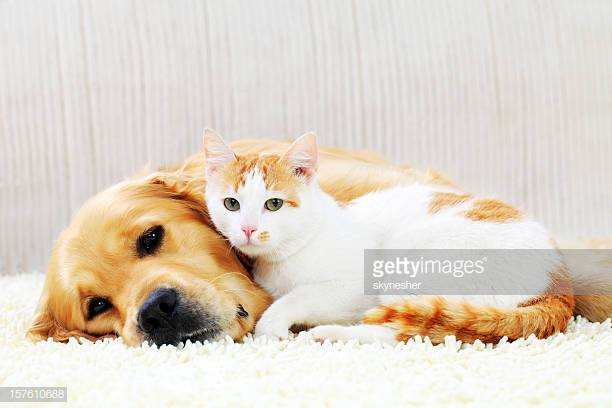

In [0]:
from IPython.display import Image

Image(filename="dogandcat.jpg")

In [0]:
result = classifier.predict(dogandcat)
print(result)


[[0.]]


In [0]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
if result[0][0] == 1:
  print("Dog")
else:
  print("Cat")

Cat


In [0]:
type(result)

numpy.ndarray

In [0]:
result

array([[1.]], dtype=float32)

In [0]:
import itertools as it
def notsame(nums):
    return all(num1 != num2 for num1, num2 in zip(nums, nums[1:])) 

def notsame2(nums): 
    for i in range(len(nums)-1):
        if nums[i] == nums[i+1]:
            return False
    return True 
    

#for item in list(it.product(a, repeat = n- 2)):
#    print(notsame(list(item)))

def desired_sequence(n, j, k):
    count = 0
    a = list(range(1, k+1))
    for item in list(it.product(a, repeat = n- 2)):
        if notsame(list(item)) and 1 != item[0] and item[len(item)-1] != j:
            count += 1
    count = count % (10**10+7)
    print(count)      
desired_sequence(5, 1, 5) 

52


<h3><center>The End</center></h3>